In [28]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [29]:
table = pd.read_csv('../data/tenders_sber_22_19_aggregates.csv')
table2 = pd.read_csv('../data/tenders_sber_25_94_aggregates.csv')

In [30]:
table = pd.concat([table2, table], ignore_index=True)

In [39]:
table

,inn,cnt_participated,cnt_won,sum_participated_amount,sum_won_amount,mean_participated_amount,mean_won_amount
0,1101145815,1.0,1.0,24337.48,24337.48,2.433748e+04,24337.480
1,1435079640,1.0,1.0,659535.56,659535.56,6.595356e+05,659535.560
2,183100192425,1.0,0.0,546687.00,0.00,5.466870e+05,NaN
3,1832133318,1.0,1.0,2883261.70,2883261.70,2.883262e+06,2883261.700
4,221001096009,1.0,0.0,4019268.06,0.00,4.019268e+06,NaN
...,...,...,...,...,...,...,...
858,9724010627,7.0,2.0,2644253.48,78155.69,3.777505e+05,39077.845
859,9725035286,1.0,0.0,1167447.00,0.00,1.167447e+06,NaN
860,9728038493,1.0,1.0,770074.87,770074.87,7.700749e+05,770074.870
861,990102784250,2.0,2.0,588360.48,588360.48,2.941802e+05,294180.240


In [40]:
tenders = table[['inn', 'mean_won_amount']]

In [41]:
len(tenders)

863

In [42]:
# tenders.mean_participated_amount.quantile([0.25,0.5,0.75])

In [43]:
total = pd.read_csv('../data/mega_total.csv')[['inn', 'revenue_x']]

In [44]:
df = tenders.merge(total, how='inner', on=['inn'])

In [45]:
df = df.dropna()

In [46]:
df

,inn,mean_won_amount,revenue_x
0,1101145815,24337.480,107440.0
1,1435079640,659535.560,797493.0
3,1832133318,2883261.700,42341.0
8,2311251522,2029223.130,701590.0
11,2312130785,329093.020,521464.0
...,...,...,...
852,9705038553,703425.890,75901.0
853,9709047750,3767208.330,358802.0
856,9715310575,5847389.670,1019975.0
857,9715361322,5783679.000,112148.0


In [47]:
d = df

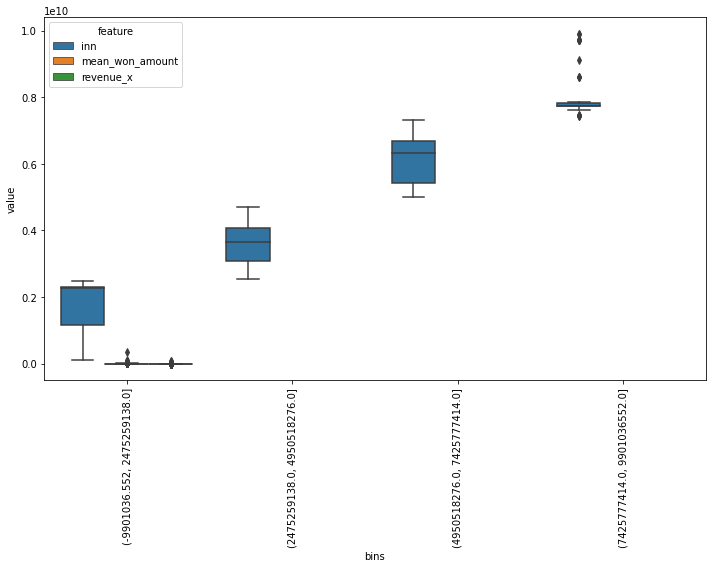

In [57]:
dlong = d.melt(var_name='feature', value_name='value')
dlong['bins'] = pd.cut(dlong['value'], 4)
fig, ax = plt.subplots(figsize=(10, 8))
ax.
sns.boxplot(data=dlong, x='bins', y='value', hue='feature', ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [49]:
df

,inn,mean_won_amount,revenue_x
0,1101145815,24337.480,107440.0
1,1435079640,659535.560,797493.0
3,1832133318,2883261.700,42341.0
8,2311251522,2029223.130,701590.0
11,2312130785,329093.020,521464.0
...,...,...,...
852,9705038553,703425.890,75901.0
853,9709047750,3767208.330,358802.0
856,9715310575,5847389.670,1019975.0
857,9715361322,5783679.000,112148.0


In [50]:
df["mean_won_amount"].quantile([0.25, 0.5, 0.75])

0.25    2.268942e+05
0.50    5.823113e+05
0.75    1.472175e+06
Name: mean_won_amount, dtype: float64

In [ ]:
separators = [2.268942e+05, 5.823113e+05, 1.472175e+06]

for idx in range(4):
    if idx == 0:
        left = 0
    else:
        left = separators[idx - 1]
        
    if idx < 2:
        right = separators[idx + 1]
    else:
        right = float("inf")
        
    print(df[df["mean_won_amount"].between(left, right)]["revenue_x"].quantile(0.2, 0.8))

0.2     13942.4
0.8    217407.0
Name: revenue_x, dtype: float64
0.2     25015.0
0.8    367174.2
Name: revenue_x, dtype: float64
0.2     25403.4
0.8    619401.0
Name: revenue_x, dtype: float64
0.2     25301.0
0.8    821689.8
Name: revenue_x, dtype: float64
